In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

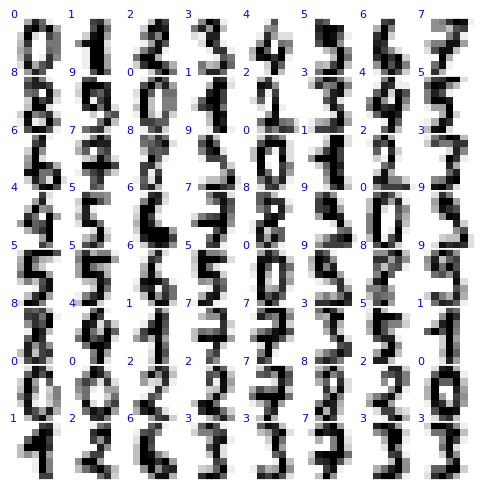

In [4]:
fig,ax = plt.subplots(8,8, figsize=(6,6))
plt.subplots_adjust(hspace=0, wspace=0)

for i,axi in enumerate(ax.flat):
  axi.set(xticks=[], yticks=[])
  axi.imshow(digits.images[i], cmap='binary')

  axi.text(0,1, str(digits.target[i]), fontsize=8,
           color='blue', transform=axi.transAxes)

In [5]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
digits_trf = model.fit_transform(digits.data)
digits_trf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

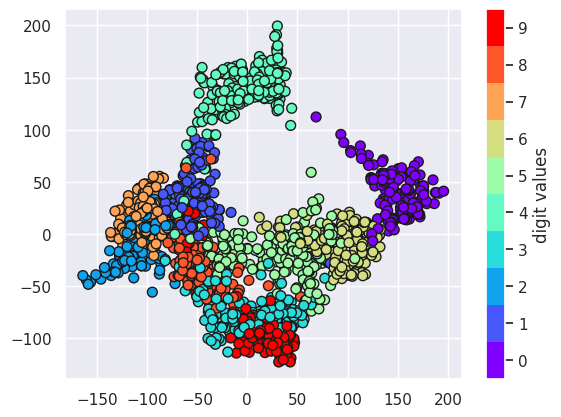

In [6]:
plt.scatter(digits_trf[:,0], digits_trf[:,1], c=digits.target, s=50, ec='k',
            cmap=mpl.colormaps['rainbow'].resampled(10))
plt.colorbar(ticks=np.arange(10), label='digit values')
plt.clim(-0.5, 9.5)

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = \
  train_test_split(digits.data, digits.target, train_size=0.6, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB()

In [9]:
ypred = model.predict(Xtest)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred,
                            target_names=digits.target_names.astype(str)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.76      0.86      0.81        73
           2       0.97      0.54      0.69        71
           3       0.69      0.83      0.75        70
           4       0.94      0.75      0.83        63
           5       0.90      0.89      0.89        89
           6       0.96      0.99      0.97        76
           7       0.73      0.98      0.84        65
           8       0.64      0.83      0.72        78
           9       0.91      0.58      0.71        74

    accuracy                           0.82       719
   macro avg       0.85      0.82      0.82       719
weighted avg       0.85      0.82      0.82       719



In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.8233657858136301

Text(109.44999999999997, 0.5, 'predicted labels')

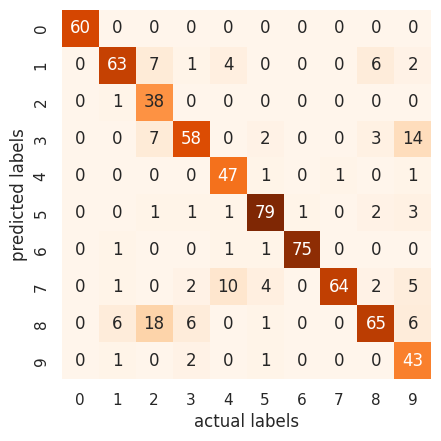

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt='d',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,
            cmap='Oranges')
plt.xlabel('actual labels')
plt.ylabel('predicted labels')

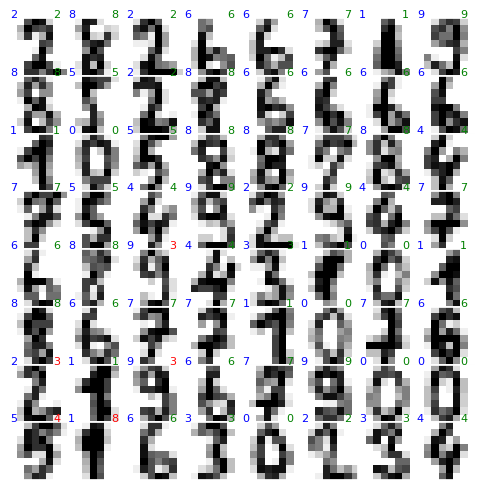

In [13]:
fig,ax = plt.subplots(8,8, figsize=(6,6))
plt.subplots_adjust(hspace=0, wspace=0)

for i,axi in enumerate(ax.flat):
  axi.set(xticks=[], yticks=[])
  axi.imshow(Xtest[i].reshape(8,8), cmap='binary')
  axi.text(0, 1, str(ytest[i]), fontsize=8,
           color='blue', transform=axi.transAxes)
  axi.text(0.75, 1, str(ypred[i]), fontsize=8,
           color='green' if ypred[i]==ytest[i] else 'red',
           transform=axi.transAxes)